In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.metrics import classification_report, accuracy_score
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
df = pd.read_csv('../Vectores_Caracteristicos_Mariposas.csv')
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

$d(p, q) = \sqrt{\sum_{i=1}^{n} (p_i - q_i)^2}$

In [19]:
def distancia_euclidiana(x1, x2):
    distancia = 0
    for i in range(len(x1)):
        distancia += (x1[i] - x2[i]) ** 2
    return distancia ** 0.5

In [20]:
def entrenar_knn(X, y):
    datos_entrenamiento = []
    for i in range(len(X)):
        punto = X[i]
        etiqueta = y[i]
        datos_entrenamiento.append((punto, etiqueta))
    return datos_entrenamiento

In [21]:
def predecir_punto_knn(datos_entrenamiento, x, vecinos):
    distancias_con_etiquetas = []
    
    for punto_entrenamiento, etiqueta_entrenamiento in datos_entrenamiento:
        distancia = distancia_euclidiana(punto_entrenamiento, x)
        distancias_con_etiquetas.append((distancia, etiqueta_entrenamiento))
    
    distancias_ordenadas = sorted(distancias_con_etiquetas, key=lambda par: par[0])
    
    etiquetas_vecinos_cercanos = [distancias_ordenadas[i][1] for i in range(vecinos)]
    contador_etiquetas = Counter(etiquetas_vecinos_cercanos)
    etiqueta_mas_comun = contador_etiquetas.most_common(1)[0][0]
    
    return etiqueta_mas_comun

In [22]:
def predecir_knn(datos_entrenamiento, X, vecinos):
    predicciones = [predecir_punto_knn(datos_entrenamiento, punto, vecinos) for punto in X]
    return predicciones

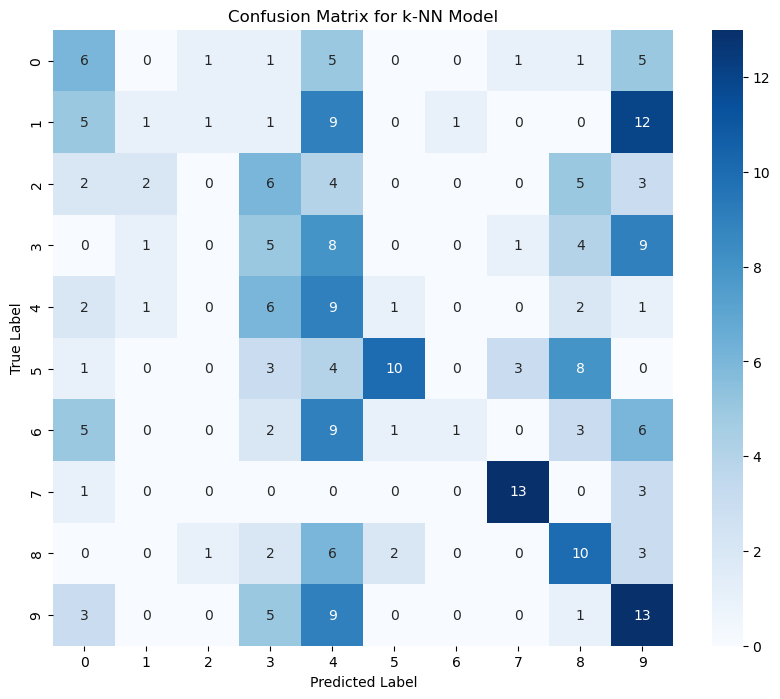

Mejor resultado:
   Precision    Recall  F1-Score  Accuracy  Vecinos
0   0.321114  0.290359  0.262916     0.272       10


In [30]:
numero_vecinos = 10
datos_entrenamiento = entrenar_knn(X_train, y_train)
y_pred = predecir_knn(datos_entrenamiento, X_test, numero_vecinos)

reporte_dict = classification_report(y_test, y_pred, output_dict=True)
exactitud = accuracy_score(y_test, y_pred)

matriz_confusion = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_confusion, annot=True, fmt='g', cmap='Blues', 
            xticklabels=list(range(10)), 
            yticklabels=list(range(10)))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for k-NN Model')
plt.show()

resultados = {
    "Precision": [reporte_dict["macro avg"]["precision"]],
    "Recall": [reporte_dict["macro avg"]["recall"]],
    "F1-Score": [reporte_dict["macro avg"]["f1-score"]],
    "Accuracy": [exactitud],
    "Vecinos": [numero_vecinos]
}

df_resultados = pd.DataFrame(resultados)

print("Mejor resultado:")
print(df_resultados)
